In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN
import logging
tf.get_logger().setLevel(logging.ERROR)

In [18]:
EPOCHS = 100
BATCH_SIZE = 16
TRAIN_TEST_SPLIT = 0.8
MIN = 12
FILE_NAME = 'data/bookstore_sales.csv'

In [21]:
def readfile(file_name):
    with open(file_name) as file:
        next(file)
        data = []
        for line in (file):
            values = line.split(',')
            data.append(float(values[2]))
        file.close()
        return np.array(data, dtype=np.float32)

# Считывание данных и разделение их на обучающие и тестовые.
sales = readfile(FILE_NAME)
months = len(sales)
split = int(months * TRAIN_TEST_SPLIT)
train_sales = sales[0:split]
test_sales = sales[split:]

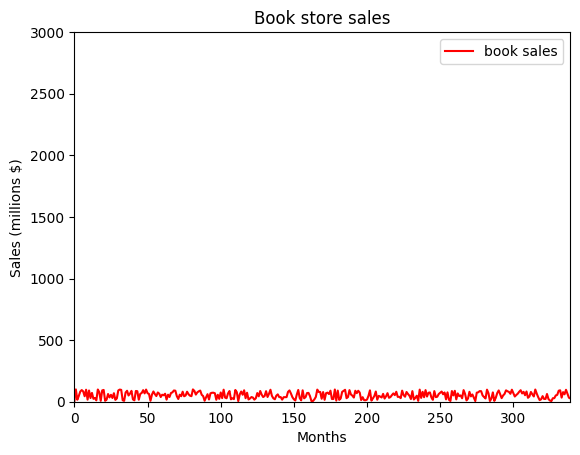

In [23]:
# Набор данных
x = range(len(sales))
plt.plot(x, sales, 'r-', label='book sales')
plt.title('Book store sales')
plt.axis([0, 339, 0.0, 3000.0])
plt.xlabel('Months')
plt.ylabel('Sales (millions $)')
plt.legend()
plt.show()

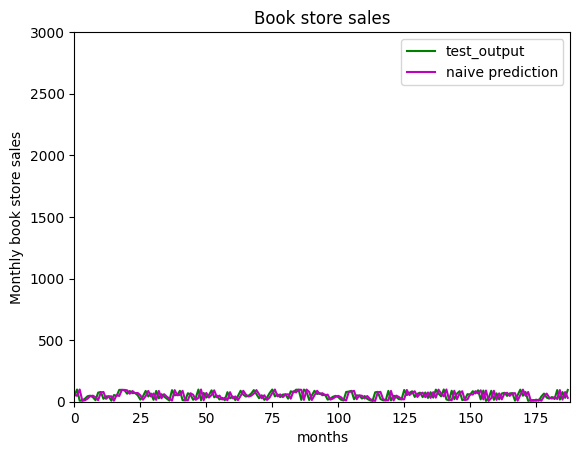

In [24]:
# Наивное предсказание
test_output = test_sales[MIN:]
naive_prediction = test_sales[MIN-1:-1]
x = range(len(test_output))
plt.plot(x, test_output, 'g-', label='test_output')
plt.plot(x, naive_prediction, 'm-', label='naive prediction')
plt.title('Book store sales')
plt.axis([0, len(test_output), 0.0, 3000.0])
plt.xlabel('months')
plt.ylabel('Monthly book store sales')
plt.legend()
plt.show()

In [25]:
# Стандартизация обучающих и тестовых данных.
# Использование только тренировочных периодов для вычисления среднего и среднеквадратичного значения.
mean = np.mean(train_sales)
stddev = np.mean(train_sales)
train_sales_std = (train_sales - mean)/stddev
test_sales_std = (test_sales - mean)/stddev

In [26]:
# Создание учебных примеров.
train_months = len(train_sales)
train_X = np.zeros((train_months-MIN, train_months-1, 1))
train_y = np.zeros((train_months-MIN, 1))
for i in range(0, train_months-MIN):
   train_X[i, -(i+MIN):, 0] = train_sales_std[0:i+MIN]
   train_y[i, 0] = train_sales_std[i+MIN]

# Создание тестовых примеров.
test_months = len(test_sales)
test_X = np.zeros((test_months-MIN, test_months-1, 1))
test_y = np.zeros((test_months-MIN, 1))
for i in range(0, test_months-MIN):
  test_X[i, -(i+MIN):, 0] = test_sales_std[0:i+MIN]
  test_y[i, 0] = test_sales_std[i+MIN]

In [27]:
# Создание RNN модели
model = Sequential()
model.add(SimpleRNN(128, activation='relu',
input_shape=(None, 1)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer = 'adam',
metrics =['mean_absolute_error'])
model.summary()
history = model.fit(train_X, train_y,
validation_data
= (test_X, test_y), epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2, shuffle=True)

C:\Users\madro\OneDrive\Документы\GitHub\Khokhlov_Dimitrii_20221_24\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,769 (65.50 KB)

 Trainable params: 16,769 (65.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
50/50 - 8s - 150ms/step - loss: 0.2616 - mean_absolute_error: 0.4397 - val_loss: 0.2919 - val_mean_absolute_error: 0.4699
Epoch 2/100
50/50 - 5s - 94ms/step - loss: 0.2511 - mean_absolute_error: 0.4309 - val_loss: 0.2954 - val_mean_absolute_error: 0.4723
Epoch 3/100
50/50 - 5s - 92ms/step - loss: 0.2489 - mean_absolute_error: 0.4280 - val_loss: 0.2973 - val_mean_absolute_error: 0.4765
Epoch 4/100
50/50 - 5s - 90ms/step - loss: 0.2460 - mean_absolute_error: 0.4227 - val_loss: 0.2954 - val_mean_absolute_error: 0.4724
Epoch 5/100
50/50 - 5s - 91ms/step - loss: 0.2424 - mean_absolute_error: 0.4203 - val_loss: 0.3012 - val_mean_absolute_error: 0.4765
Epoch 6/100
50/50 - 5s - 90ms/step - loss: 0.2390 - mean_absolute_error: 0.4156 - val_loss: 0.2968 - val_mean_absolute_error: 0.4739
Epoch 7/100
50/50 - 4s - 89ms/step - loss: 0.2324 - mean_absolute_error: 0.4093 - val_loss: 0.3184 - val_mean_absolute_error: 0.4891
Epoch 8/100
50/50 - 5s - 93ms/step - loss: 0.2295 - mean_absolute_er

In [28]:
# Создание наивного прогноза на основе стандартизированных данных.
test_output = test_sales_std[MIN:]
naive_prediction = test_sales_std[MIN-1:-1]
mean_squared_error = np.mean(np.square(naive_prediction - test_output))
mean_abs_error = np.mean(np.abs(naive_prediction - test_output))
print('naive test mse: ', mean_squared_error)
print('naive test mean abs: ', mean_abs_error)


# Использование обученной модели для прогнозирования тестовых данных
predicted_test = model.predict(test_X, len(test_X))
predicted_test = np.reshape(predicted_test,(len(predicted_test)))
predicted_test = predicted_test * stddev + mean




# # Уменьшение периода ожидания при вводе.
# train_X = train_X[:, (train_months - 13):, :]
# test_X = test_X[:, (test_months - 13):, :]
# # Создание модели с прямой связью.
# model.add(Flatten(input_shape=(12, 1))) model.add(Dense(256, activation='relu')) model.add(Dense(1, activation='linear'))

naive test mse:  0.56754434
naive test mean abs:  0.6121703
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


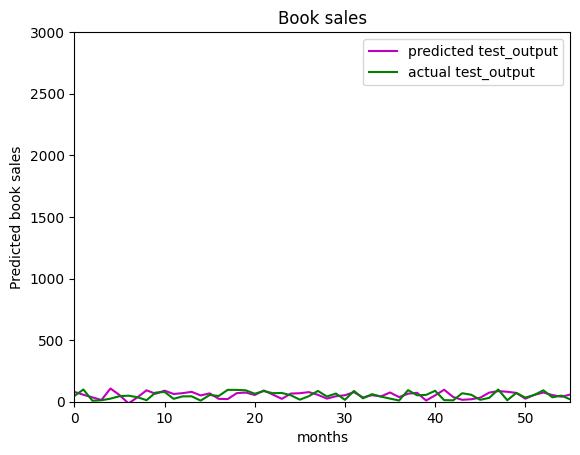

In [29]:
x = range(len(test_sales)-MIN)
plt.plot(x, predicted_test, 'm-',label='predicted test_output')
plt.plot(x, test_sales[-(len(test_sales)-MIN):],'g-', label='actual test_output')
plt.title('Book sales')
plt.axis([0, 55, 0.0, 3000.0])
plt.xlabel('months')
plt.ylabel('Predicted book sales')
plt.legend()
plt.show()